# Twitter Challenge 1


## Recall that you were asked to retrieve ~ 10K tweets last week.

## Do the following:

1. Use any Python package(s) of your choice
2. Perform text pre-processing
3. Generate a word cloud
4. Post the word cloud (image) as a Tweet (using your own Twitter account).

### Briefly describe: what is the topic? what is the data period?
### Include #is434 #smu #scis hashtags in your tweet.

In [26]:
# !pip install spacy-langdetect
!pip install deep-translator

In [2]:
import pandas as pd

data = pd.read_csv("../../w3/10k_tweets")
data

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2022-01-19 23:59:58+00:00,1483952404827709441,"play, te amo 1D\n\nRosé the best pretty girl ...",vlygrsie
1,1,2022-01-19 23:59:58+00:00,1483952402982129665,BLACKPINK Free Membership 💘 https://t.co/pdTQB...,BLACKPlNKFRANCE
2,2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8
3,3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim
4,4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq
...,...,...,...,...,...
9996,9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997
9997,9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28
9998,9998,2022-01-19 11:04:27+00:00,1483757240977080321,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...,leileiann14
9999,9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms


In [5]:
tweet_text_list = data['Text'].tolist()

tweet_text_list

['play, te amo 1D\n\nRosé the best pretty girl  \n블랙핑크 로제 #ROSÉ #로제 @BLACKPINK https://t.co/xHrcmNoKfz',
 'BLACKPINK Free Membership 💘 https://t.co/pdTQBY9Kaz',
 '@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้วยนะ💕💞💓💗💖💘💌😚🤭\n블랙핑크 리사 최고의 여자 \n블랙핑크 리사, 우리는 너를 너무 사랑해\n블랙핑크 리사, 당신은 사랑을 받고 있습니다\n블랙핑크 리사, 우리는 항상 당신을 자랑스럽게 생각합니다\n블랙핑크 리사 #LISA #LALISA #ลิซ่า #블랙핑크 #리사 @BLACKPINK',
 'edits, videos random/tiernos\n\n블랙핑크 제니 #JENNIE #제니 #김제니 #BLACKPINK #블랙핑크 https://t.co/NcjI3CW2e4',
 'That\n\nNo me gusta tanto lo negro del vestido pero se le ve hermoso\n블랙핑크 지수 #블랙핑크 #지수 #ジス #JISOO #블랙핑크지수 #BLACKPINK @BLACKPINK https://t.co/yENk6Xz0gx',
 '@XVN3HYE blackpink https://t.co/1L9ojkdbHZ',
 '@tonicolpapi Acaso estás sugiriendo un performance de las blackpink originales? https://t.co/nlHUd2I2RI',
 '@daanniedarko @cpherart @loonatheworld @ladygaga @BLACKPINK @alanaldana Wow!!',
 'that \n\nJisoo reina linda presiosa pretty \n블랙핑크 지수 #블랙핑크 #지수 #ジス #JISOO #블랙핑크지수 #BLACKPINK @BLACKPINK https://t.co/lQgZDIBOUm

## language detection

In [19]:
from spacy_langdetect import LanguageDetector
import en_core_web_sm

nlp = en_core_web_sm.load()
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)
text_content = "Er lebt mit seinen Eltern und seiner Schwester in Berlin."
doc = nlp(text_content)
detect_language = doc._.language
print(detect_language)

{'language': 'de', 'score': 0.9999968937015054}


In [20]:
languages = []
for each_tweet in tweet_text_list:
    languages.append(nlp(each_tweet)._.language['language'])
languages

['en',
 'en',
 'ko',
 'lt',
 'it',
 'sv',
 'es',
 'so',
 'et',
 'pt',
 'ko',
 'es',
 'de',
 'ar',
 'th',
 'ko',
 'pt',
 'pt',
 'et',
 'ko',
 'ko',
 'es',
 'en',
 'ko',
 'en',
 'es',
 'es',
 'en',
 'en',
 'ko',
 'pt',
 'ko',
 'pt',
 'tl',
 'en',
 'en',
 'es',
 'ko',
 'ca',
 'en',
 'ko',
 'es',
 'en',
 'ko',
 'en',
 'en',
 'en',
 'en',
 'ko',
 'et',
 'es',
 'en',
 'ca',
 'es',
 'en',
 'en',
 'ko',
 'en',
 'pt',
 'es',
 'ko',
 'es',
 'ko',
 'ko',
 'ko',
 'af',
 'es',
 'ko',
 'tl',
 'en',
 'en',
 'ja',
 'ko',
 'es',
 'ko',
 'en',
 'en',
 'en',
 'es',
 'id',
 'es',
 'ko',
 'ko',
 'en',
 'ko',
 'pt',
 'es',
 'en',
 'vi',
 'es',
 'es',
 'ko',
 'ko',
 'de',
 'es',
 'et',
 'ko',
 'es',
 'es',
 'en',
 'ko',
 'es',
 'es',
 'pt',
 'en',
 'es',
 'sv',
 'en',
 'id',
 'ko',
 'es',
 'en',
 'ko',
 'ko',
 'es',
 'en',
 'en',
 'es',
 'es',
 'ko',
 'en',
 'en',
 'ko',
 'pt',
 'es',
 'es',
 'id',
 'ko',
 'en',
 'es',
 'es',
 'fr',
 'es',
 'es',
 'ko',
 'en',
 'ko',
 'en',
 'lt',
 'en',
 'tl',
 'es',
 'en',

In [22]:
data['languages'] = languages

In [23]:
data

,Unnamed: 0,Datetime,Tweet Id,Text,Username,languages
0,0,2022-01-19 23:59:58+00:00,1483952404827709441,"play, te amo 1D\n\nRosé the best pretty girl ...",vlygrsie,en
1,1,2022-01-19 23:59:58+00:00,1483952402982129665,BLACKPINK Free Membership 💘 https://t.co/pdTQB...,BLACKPlNKFRANCE,en
2,2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko
3,3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt
4,4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it
...,...,...,...,...,...,...
9996,9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt
9997,9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28,ca
9998,9998,2022-01-19 11:04:27+00:00,1483757240977080321,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...,leileiann14,en
9999,9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms,tl


In [24]:
data[data['languages'] != 'en'].head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,languages
2,2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko
3,3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt
4,4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it
5,5,2022-01-19 23:59:43+00:00,1483952341732798465,@XVN3HYE blackpink https://t.co/1L9ojkdbHZ,Iuvmyjimin,sv
6,6,2022-01-19 23:59:41+00:00,1483952333205688321,@tonicolpapi Acaso estás sugiriendo un perform...,heymarc_,es


In [35]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [36]:
data

,Datetime,Tweet Id,Text,Username,languages
0,2022-01-19 23:59:58+00:00,1483952404827709441,"play, te amo 1D\n\nRosé the best pretty girl ...",vlygrsie,en
1,2022-01-19 23:59:58+00:00,1483952402982129665,BLACKPINK Free Membership 💘 https://t.co/pdTQB...,BLACKPlNKFRANCE,en
2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko
3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt
4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it
...,...,...,...,...,...
9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt
9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28,ca
9998,2022-01-19 11:04:27+00:00,1483757240977080321,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...,leileiann14,en
9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms,tl


In [37]:
non_english = data[data['languages'] != 'en']

In [39]:
non_english

,Datetime,Tweet Id,Text,Username,languages
2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko
3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt
4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it
5,2022-01-19 23:59:43+00:00,1483952341732798465,@XVN3HYE blackpink https://t.co/1L9ojkdbHZ,Iuvmyjimin,sv
6,2022-01-19 23:59:41+00:00,1483952333205688321,@tonicolpapi Acaso estás sugiriendo un perform...,heymarc_,es
...,...,...,...,...,...
9993,2022-01-19 11:04:43+00:00,1483757304969416707,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt
9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt
9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28,ca
9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms,tl


In [40]:
#creating new_text column
data['new_text'] = data['Text']

In [41]:
data

,Datetime,Tweet Id,Text,Username,languages,new_text
0,2022-01-19 23:59:58+00:00,1483952404827709441,"play, te amo 1D\n\nRosé the best pretty girl ...",vlygrsie,en,"play, te amo 1D\n\nRosé the best pretty girl ..."
1,2022-01-19 23:59:58+00:00,1483952402982129665,BLACKPINK Free Membership 💘 https://t.co/pdTQB...,BLACKPlNKFRANCE,en,BLACKPINK Free Membership 💘 https://t.co/pdTQB...
2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...
3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI..."
4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it,That\n\nNo me gusta tanto lo negro del vestido...
...,...,...,...,...,...,...
9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...
9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28,ca,tremenda diosa \n\nlisa is radiant and unique ...
9998,2022-01-19 11:04:27+00:00,1483757240977080321,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...,leileiann14,en,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...
9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms,tl,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...


## translation

In [71]:
non_english = data[data['languages'] != 'en']['Text']
non_english

2        @BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...
3        edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...
4        That\n\nNo me gusta tanto lo negro del vestido...
5               @XVN3HYE blackpink https://t.co/1L9ojkdbHZ
6        @tonicolpapi Acaso estás sugiriendo un perform...
                               ...                        
9993     @_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...
9996     @_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...
9997     tremenda diosa \n\nlisa is radiant and unique ...
9999     @joyluvbest @BLACKPINK_iKON Sayang yung suppor...
10000    @_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...
Name: Text, Length: 6146, dtype: object

In [74]:
from deep_translator import GoogleTranslator

non_english = data[data['languages'] != 'en']['Text']

translated = []

for each in non_english:
    translate = GoogleTranslator(source='auto', target='en').translate(each)
    translated.append(translate)

In [75]:
# convert translated list to df
translated_df = pd.DataFrame(translated, columns = ['translated'])

In [76]:
translated_df

,translated
0,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค๞\nBl...
1,"edits, videos random/tiernos\n\nBLACKPINK JENN..."
2,That\n\nNo me gusta tanto lo negro del vestido...
3,@XVN3HYE blackpink https://t.co/1L9ojkdbHZ
4,@tonicolpapi Are you suggesting a performance ...
...,...
6141,@_R_BR @Rosie56170569 @BLACKPINK BLACKPINK Ros...
6142,@_R_BR @Rosie56170569 @BLACKPINK BLACKPINK Ros...
6143,tremenda diosa\n\nlisa is radiant and unique B...
6144,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...


In [54]:
translated_df.iloc[0]['translated']

"@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค\u0e5e\nBlackpink Lisa's best girl\nBlackpink Lisa, we love you so much\nBlackpink Lisa, you are loved\nBlackpink Lisa, we are always proud of you\nBLACKPINK Lisa #LISA #LALISA #ลิซ่า #BLACKPINK #LISA @BLACKPINK"

In [59]:
translated_df['translated'][0]

"@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค\u0e5e\nBlackpink Lisa's best girl\nBlackpink Lisa, we love you so much\nBlackpink Lisa, you are loved\nBlackpink Lisa, we are always proud of you\nBLACKPINK Lisa #LISA #LALISA #ลิซ่า #BLACKPINK #LISA @BLACKPINK"

In [67]:
test = "@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค\u0e5e\nBlackpink Lisa's best girl\nBlackpink Lisa, we love you so much\nBlackpink Lisa, you are loved\nBlackpink Lisa, we are always proud of you\nBLACKPINK Lisa #LISA #LALISA #ลิซ่า #BLACKPINK #LISA @BLACKPINK"
translate = GoogleTranslator(source='auto', target='en').translate(test)
translate

"@BPJJLC010964 Drink lots of water and take care of yourself.\nBlackpink Lisa's best girl\nBlackpink Lisa, we love you so much\nBlackpink Lisa, you are loved\nBlackpink Lisa, we are always proud of you\nBLACKPINK Lisa #LISA #LALISA #LISA #BLACKPINK #LISA @BLACKPINK"

In [46]:
indexes_list = non_english.index
indexes_list

Int64Index([    2,     3,     4,     5,     6,     7,     8,     9,    10,
               11,
            ...
             9986,  9988,  9989,  9990,  9991,  9993,  9996,  9997,  9999,
            10000],
           dtype='int64', length=6146)

In [77]:
pd.options.mode.chained_assignment = None  # default='warn'
for i in range(0,6146):
    index = indexes_list[i]
    data.iloc[index]['new_text'] = translated_df.iloc[i]['translated']

In [78]:
data

,Datetime,Tweet Id,Text,Username,languages,new_text
0,2022-01-19 23:59:58+00:00,1483952404827709441,"play, te amo 1D\n\nRosé the best pretty girl ...",vlygrsie,en,"play, te amo 1D\n\nRosé the best pretty girl ..."
1,2022-01-19 23:59:58+00:00,1483952402982129665,BLACKPINK Free Membership 💘 https://t.co/pdTQB...,BLACKPlNKFRANCE,en,BLACKPINK Free Membership 💘 https://t.co/pdTQB...
2,2022-01-19 23:59:55+00:00,1483952392093995008,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค้าด้ว...,LILIDREAM8,ko,@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค๞\nBl...
3,2022-01-19 23:59:54+00:00,1483952388583174152,"edits, videos random/tiernos\n\n블랙핑크 제니 #JENNI...",itrubykim,lt,"edits, videos random/tiernos\n\nBLACKPINK JENN..."
4,2022-01-19 23:59:52+00:00,1483952380257476613,That\n\nNo me gusta tanto lo negro del vestido...,swituniq,it,That\n\nNo me gusta tanto lo negro del vestido...
...,...,...,...,...,...,...
9996,2022-01-19 11:04:34+00:00,1483757270387335168,@_R_BR @Rosie56170569 @BLACKPINK 블랙핑크 로제 #ROSÉ...,rosepark997,lt,@_R_BR @Rosie56170569 @BLACKPINK BLACKPINK Ros...
9997,2022-01-19 11:04:32+00:00,1483757261734526976,tremenda diosa \n\nlisa is radiant and unique ...,lxwalls28,ca,tremenda diosa\n\nlisa is radiant and unique B...
9998,2022-01-19 11:04:27+00:00,1483757240977080321,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...,leileiann14,en,they're so cute 😍\n@BLACKPINK \n\n📎https://t.c...
9999,2022-01-19 11:04:25+00:00,1483757232516841472,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...,mhaellms,tl,@joyluvbest @BLACKPINK_iKON Sayang yung suppor...


## stopword, punctuation, non-alphanumeric characters, links, hashtags, mentions removal + lowercase

In [79]:
import numpy as np
import re

stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [80]:
tweet_text_list = data['new_text'].tolist()

tweet_text_list

['play, te amo 1D\n\nRosé the best pretty girl  \n블랙핑크 로제 #ROSÉ #로제 @BLACKPINK https://t.co/xHrcmNoKfz',
 'BLACKPINK Free Membership 💘 https://t.co/pdTQBY9Kaz',
 "@BPJJLC010964 ดื่มน้ำเยอะๆดูแลตัวเองให้เค\u0e5e\nBlackpink Lisa's best girl\nBlackpink Lisa, we love you so much\nBlackpink Lisa, you are loved\nBlackpink Lisa, we are always proud of you\nBLACKPINK Lisa #LISA #LALISA #ลิซ่า #BLACKPINK #LISA @BLACKPINK",
 'edits, videos random/tiernos\n\nBLACKPINK JENNIE #JENNIE #JENNIE #JENNIE KIM #BLACKPINK #BLACKPINK https://t.co/NcjI3CW2e4',
 'That\n\nNo me gusta tanto lo negro del vestido pero se le ve hermoso\nBLACKPINK Jisoo #BLACKPINK #Jisoo #gis #JISOO #BLACKPINK Jisoo #BLACKPINK @BLACKPINK https://t.co/yENk6Xz0gx',
 '@XVN3HYE blackpink https://t.co/1L9ojkdbHZ',
 '@tonicolpapi Are you suggesting a performance of the original blackpink? https://t.co/nlHUd2I2RI',
 '@daanniedarko @cpherart @loonatheworld @ladygaga @BLACKPINK @alanaldana Wow !!',
 'that\n\nJisoo reina linda presiosa pret

In [81]:
results = [clean_tweet(tw) for tw in tweet_text_list]
results

C:\Users\User\AppData\Local\Temp/ipykernel_34044/1075154670.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['play te amo 1d ros best pretty girl',
 'blackpink free membership',
 'blackpink lisas best girl blackpink lisa we love you so much blackpink lisa you are loved blackpink lisa we are always proud you blackpink lisa',
 'edits videos random tiernos blackpink jennie kim',
 'that no me gusta tanto lo negro del vestido pero se le ve hermoso blackpink jisoo jisoo',
 'blackpink',
 'are you suggesting performance original blackpink',
 'wow',
 'that jisoo reina linda presiosa pretty blackpink jisoo jisoo',
 'people i won blackpink cropped here comes reaction',
 'blackpink s lisa is best girl blackpink lisa we love you so much blackpink lisa you are loved blackpink lisa we are always proud you blackpink lisa',
 'seria casi no cambia de expresi n xdd blackpink jennie kim',
 'gefe',
 'we are all same',
 'everyone its very urgent now number 2 is following us lot only 1 000 votes away there are only 35 hours left lets help each other we can do it sure yay',
 'blackpink lisa is best girl blackpink l

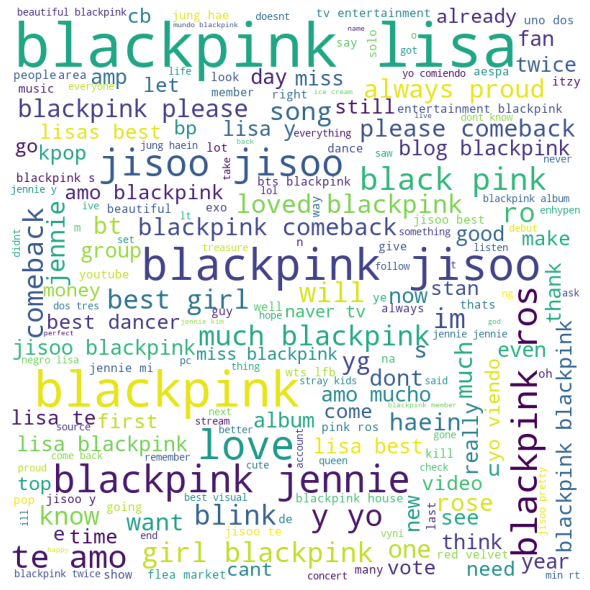

In [82]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in results:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()